### Class Dictionary

* age: Displays the age of the individual.

* sex: Displays the gender of the individual using the following format : 1 = male 0 = female

* cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

* trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

* chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

* fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

* restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

* thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

* exang- Exercise induced angina : 1 = yes 0 = no

* oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

* slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

* ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

* thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

* target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay

In [2]:
df= pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

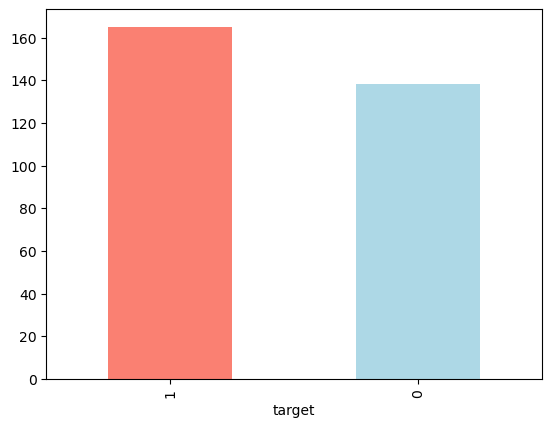

In [9]:
df["target"].value_counts().plot.bar(color=["salmon","lightblue"]);

In [10]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

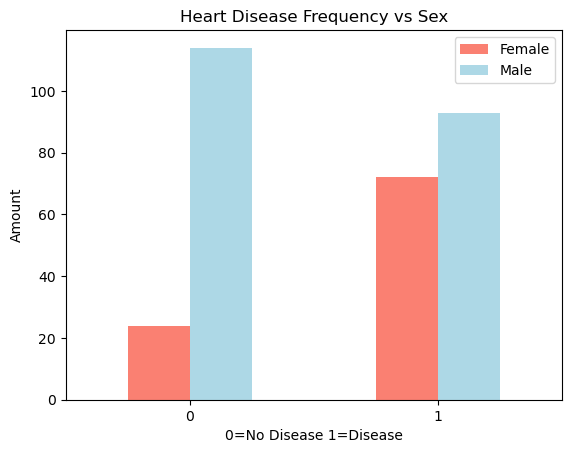

In [11]:
pd.crosstab(df["target"],df["sex"]).plot.bar(color=["salmon","lightblue"])
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0=No Disease 1=Disease")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["Female","Male"]);

In [12]:
df["cp"].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [13]:
pd.crosstab(df["cp"],
            df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


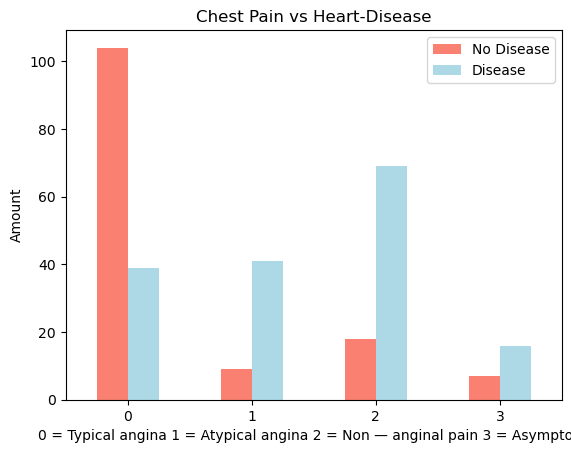

In [14]:
pd.crosstab(df["cp"],
            df["target"]).plot(kind="bar",
                               color=["salmon","lightblue"]);
plt.title("Chest Pain vs Heart-Disease")
plt.xlabel("0 = Typical angina 1 = Atypical angina 2 = Non — anginal pain 3 = Asymptotic")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.legend(["No Disease","Disease"]);

In [15]:
df["trestbps"].value_counts()

trestbps
120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: count, dtype: int64

In [16]:
pd.crosstab(df["target"],
            df["trestbps"])

trestbps,94,100,101,102,104,105,106,108,110,112,...,160,164,165,170,172,174,178,180,192,200
target,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,0,0,0,0,2,11,4,...,6,1,1,3,0,1,1,2,1,1
1,2,2,1,2,1,3,1,4,8,5,...,5,0,0,1,1,0,1,1,0,0


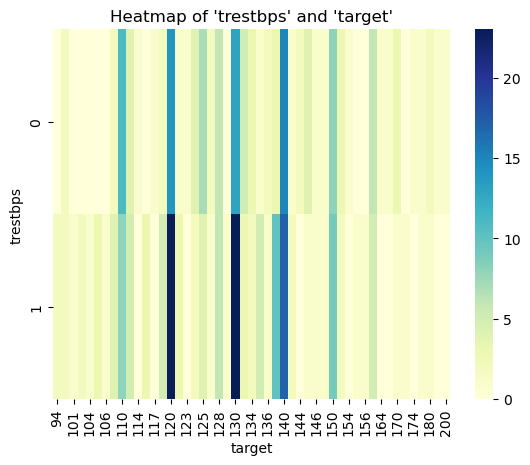

In [17]:
cross_tab = pd.crosstab(df["target"], df["trestbps"])

sns.heatmap(cross_tab, cmap="YlGnBu")
plt.xlabel("target")
plt.ylabel("trestbps")
plt.title("Heatmap of 'trestbps' and 'target'");

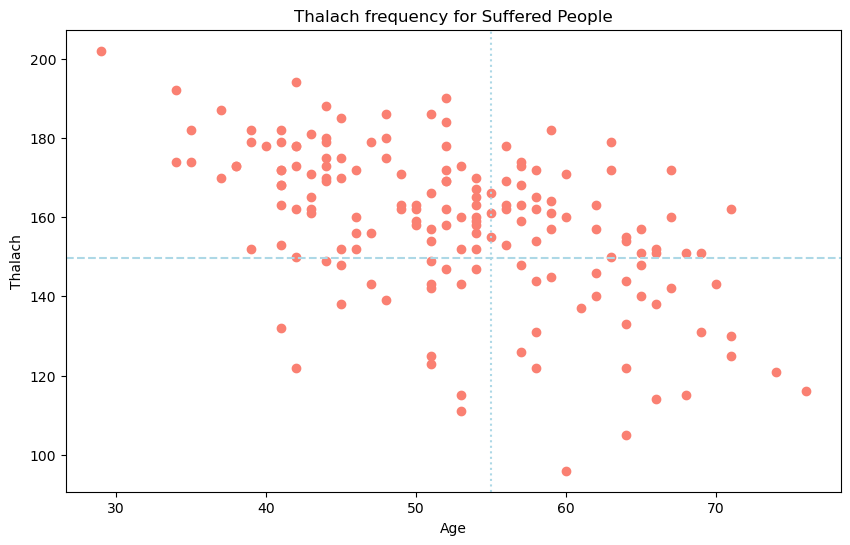

In [18]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
plt.title("Thalach frequency for Suffered People")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.axhline(y=df.thalach.mean(), color='lightblue', linestyle='--', label="Horizontal Line at average thalach value")
plt.axvline(x=df.age.median(), color="lightblue", linestyle=":", label="Vertical line at medan value of age");

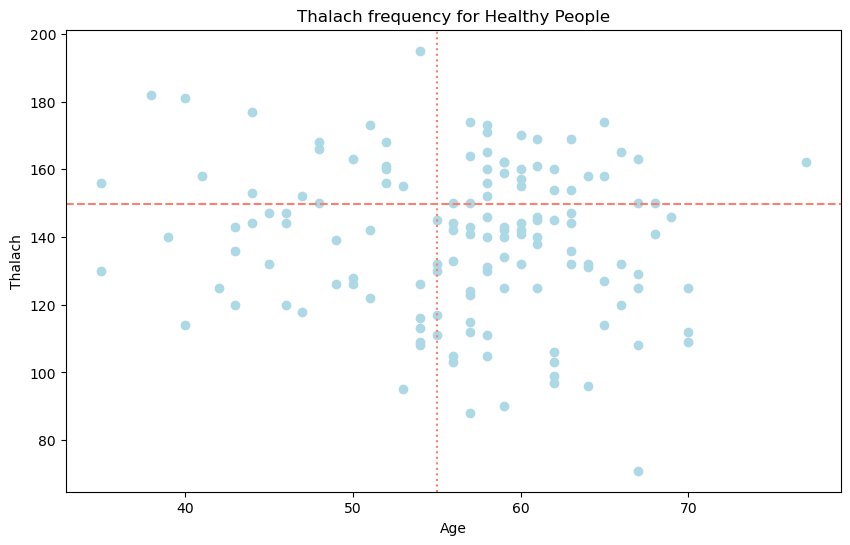

In [19]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue")
plt.title("Thalach frequency for Healthy People")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.axhline(y=df.thalach.mean(), color='salmon', linestyle='--', label="Horizontal Line at average thalach value")
plt.axvline(x=df.age.median(), color="salmon", linestyle=":", label="Vertical line at medan value of age");

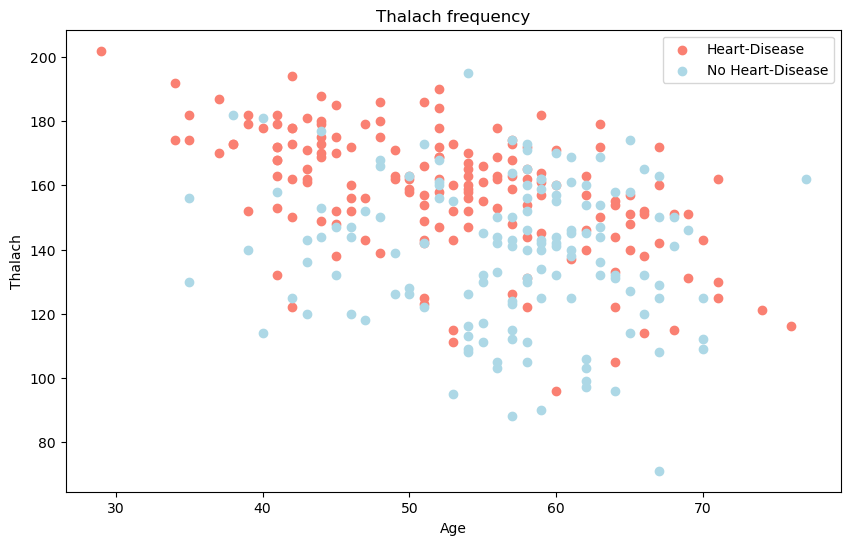

In [20]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon",
            label="Heart-Disease")
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue",
            label="No Heart-Disease")
plt.title("Thalach frequency")
plt.xlabel("Age")
plt.ylabel("Thalach")
plt.legend(loc="upper right");

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


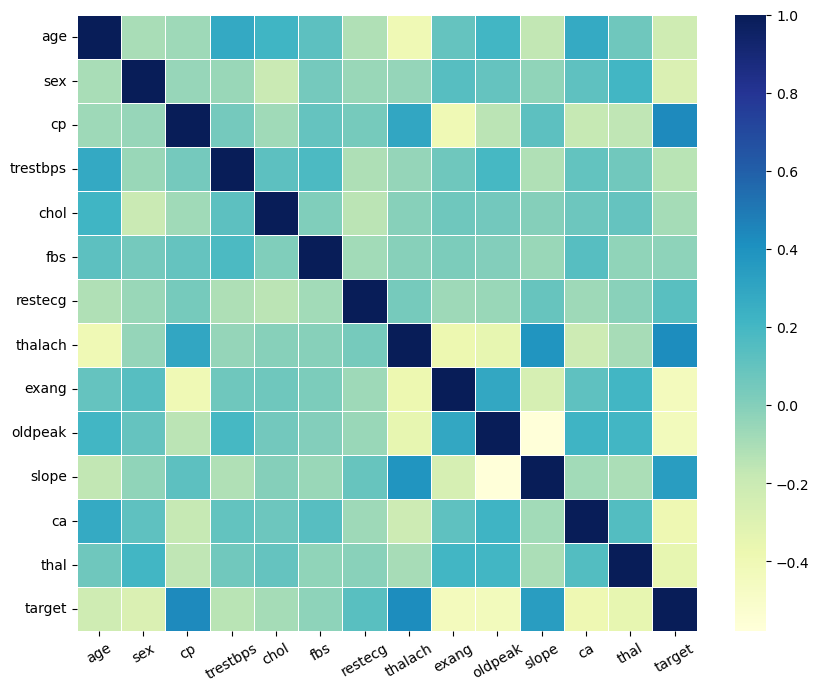

In [22]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
corr_map=sns.heatmap(corr_matrix,
                    linewidths=0.5,
                    cmap="YlGnBu")
plt.xticks(rotation=30);

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X=df.drop("target", axis=1)
y=df["target"]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [27]:
np.random.seed(42)
clf1=LogisticRegression(max_iter=1000)
clf1.fit(X_train,y_train)
clf1.score(X_test,y_test)

0.8852459016393442

In [28]:
np.random.seed(42)
clf2=KNeighborsClassifier()
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.7377049180327869

In [29]:
np.random.seed(42)
clf3=RandomForestClassifier()
clf3.fit(X_train,y_train)
clf3.score(X_test,y_test)

0.819672131147541

In [30]:
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and Scores the model 
    """
    np.random.seed(42)
    model_score={}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test, y_test) * 100
    return model_score

In [31]:
models={"Logistic Regression":LogisticRegression(max_iter=1000),
        "K-Neighbors Classifier":KNeighborsClassifier(),
        "Random-Forest Classifier":RandomForestClassifier()}

score=fit_and_score(models, X_train, X_test, y_train, y_test)
score

{'Logistic Regression': 88.52459016393442,
 'K-Neighbors Classifier': 73.77049180327869,
 'Random-Forest Classifier': 81.9672131147541}

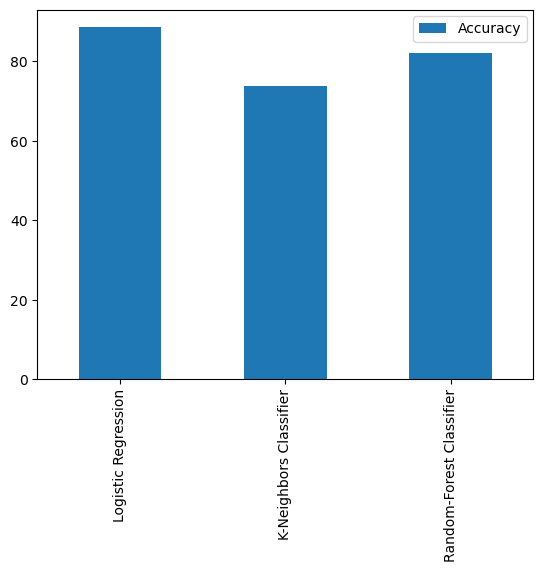

In [32]:
model_compare=pd.DataFrame(score, index=["Accuracy"])
model_compare.T.plot(kind="bar");

In [33]:
train_score=[]
test_score=[]
neighbors=range(1,21)
for i in neighbors:
    np.random.seed(42)
    clf2.set_params(n_neighbors=i)
    clf2.fit(X_train,y_train)
    
    train_score.append(clf2.score(X_train,y_train))
    test_score.append(clf2.score(X_test,y_test))
train_score

[1.0,
 0.7975206611570248,
 0.7520661157024794,
 0.731404958677686,
 0.7479338842975206,
 0.7396694214876033,
 0.7107438016528925,
 0.7396694214876033,
 0.7066115702479339,
 0.6818181818181818,
 0.6983471074380165,
 0.6942148760330579,
 0.6735537190082644,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6735537190082644,
 0.6859504132231405,
 0.6942148760330579,
 0.6942148760330579]

In [34]:
test_score

[0.639344262295082,
 0.639344262295082,
 0.6885245901639344,
 0.7377049180327869,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.6557377049180327,
 0.6885245901639344,
 0.7049180327868853,
 0.7213114754098361,
 0.6557377049180327,
 0.6885245901639344,
 0.639344262295082,
 0.6721311475409836,
 0.6885245901639344,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344]

In [35]:
max(train_score)

1.0

In [36]:
print(f"{max(test_score)*100:.2f}%")

73.77%


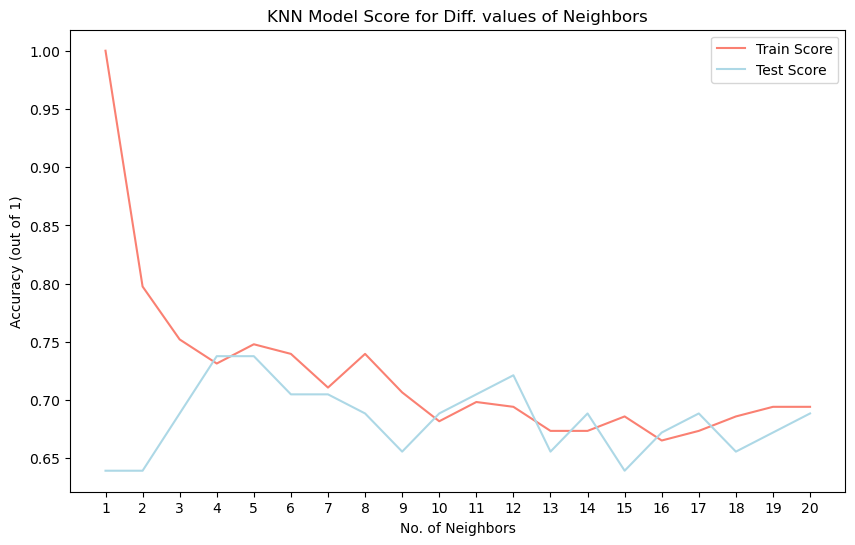

In [37]:
fig, ax=plt.subplots(figsize=(10,6))
ax.plot(neighbors,train_score,label="Train Score",color="salmon")
ax.plot(neighbors,test_score,label="Test Score",color="lightblue")
ax.set_title("KNN Model Score for Diff. values of Neighbors")
ax.set_xlabel("No. of Neighbors")
ax.set_ylabel("Accuracy (out of 1)")
ax.set_xticks(np.arange(1,21,1))
ax.legend();

In [38]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,10),
         "min_samples_leaf":np.arange(1,20,2)}

In [39]:
np.random.seed(42)

rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                             param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(X_train,y_train)
rs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [41]:
rs_log_reg.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [52]:
np.random.seed(42)

rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)
rs_rf.fit(X_train,y_train)
rs_rf.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [43]:
rs_rf.best_params_

{'n_estimators': 760,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_depth': None}

In [44]:
rs_rf.best_estimator_

RandomForestClassifier(min_samples_leaf=7, n_estimators=760)

In [45]:
np.random.seed(42)
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
gs_log_reg.fit(X_train,y_train)
gs_log_reg.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


0.8688524590163934

In [46]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [47]:
gs_log_reg.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='liblinear')

<!-- # np.random.seed(42)
# rf_grid2={"n_estimators":np.arange(10,100,50),
#          "max_depth":[None,3,10],
#          "min_samples_split":np.arange(2,10,2),
#          "min_samples_leaf":np.arange(1,10,2)}
# gs_rf=GridSearchCV(RandomForestClassifier(),
#                        param_grid=rf_grid2,
#                        cv=5,
#                        verbose=True)
# gs_rf.fit(X_train,y_train)
# gs_rf.score(X_test,y_test) -->

In [48]:
y_preds=gs_log_reg.predict(X_test)
y_preds

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0], dtype=int64)

In [3]:
RocCurveDisplay.from_estimator(y_test, y_preds);

NameError: name 'y_test' is not defined

In [50]:
print(confusion_matrix(y_test,y_preds))

[[25  6]
 [ 2 28]]


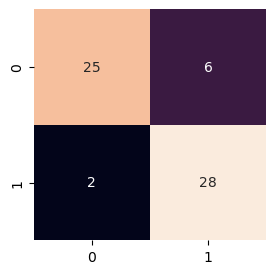

In [54]:
def conf_mat_map(y_test,y_preds):
    """
    Make sns Heatmap for Confusion Matrix
    """
    fig, ax=plt.subplots(figsize=(3,3))
    sns.heatmap(confusion_matrix(y_test,y_preds),
               annot=True,
               cbar=False)
conf_mat_map(y_test,y_preds)

In [55]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.93      0.81      0.86        31
           1       0.82      0.93      0.87        30

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [56]:
gs_log_reg.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [59]:
np.random.seed(42)
clff=LogisticRegression(C=0.08858667904100823,
                       solver="liblinear")

In [60]:
clff.fit(X_train,y_train)

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [62]:
cv_acc=cross_val_score(clff,
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.86666667, 0.75      ])

In [63]:
np.mean(cv_acc)

0.834808743169399

In [64]:
cv_pre=cross_val_score(clff,
                      X,
                      y,
                      cv=5,
                      scoring="precision")
cv_pre

array([0.775     , 0.88571429, 0.84848485, 0.85714286, 0.725     ])

In [66]:
np.mean(cv_pre)

0.8182683982683983

In [67]:
cv_rcl=cross_val_score(clff,
                      X,
                      y,
                      cv=5,
                      scoring="recall")
cv_rcl

array([0.93939394, 0.93939394, 0.84848485, 0.90909091, 0.87878788])

In [69]:
np.mean(cv_rcl)

0.9030303030303031

In [71]:
cv_f1=cross_val_score(clff,
                      X,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.84848485, 0.88235294, 0.79452055])

In [72]:
np.mean(cv_f1)

0.8572876223964057

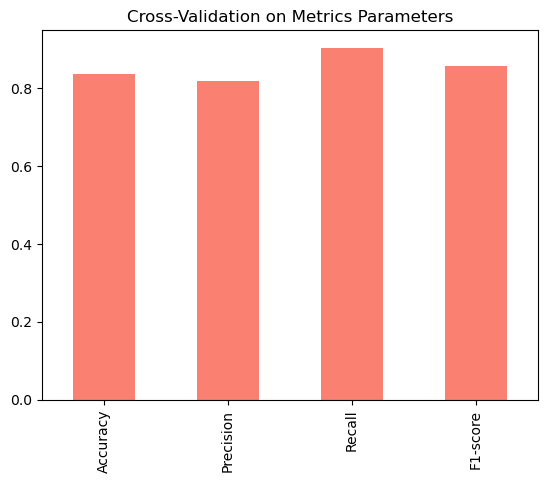

In [83]:
cv_metrics=pd.DataFrame({"Accuracy":np.mean(cv_acc),
                       "Precision":np.mean(cv_pre),
                       "Recall":np.mean(cv_rcl),
                       "F1-score":np.mean(cv_f1)},
                       index=[0])
cv_metrics.T.plot.bar(title="Cross-Validation on Metrics Parameters",
                     legend=None,
                     color="salmon");

In [84]:
clff.coef_

array([[-2.25583268e-04, -6.52542396e-01,  5.44507602e-01,
        -9.06352616e-03, -1.57554831e-03, -4.30012581e-03,
         1.91590576e-01,  2.21107258e-02, -3.69987677e-01,
        -5.01056446e-01,  3.10956573e-01, -5.15022754e-01,
        -5.11492144e-01]])

In [85]:
feature_dict=dict(zip(df.columns,list(clff.coef_[0])))
feature_dict

{'age': -0.00022558326832780915,
 'sex': -0.6525423962432686,
 'cp': 0.5445076017533194,
 'trestbps': -0.009063526162703976,
 'chol': -0.0015755483149544481,
 'fbs': -0.004300125810713346,
 'restecg': 0.19159057601789753,
 'thalach': 0.022110725791939585,
 'exang': -0.3699876774144646,
 'oldpeak': -0.5010564464230755,
 'slope': 0.31095657309367847,
 'ca': -0.5150227537240641,
 'thal': -0.5114921440205584}

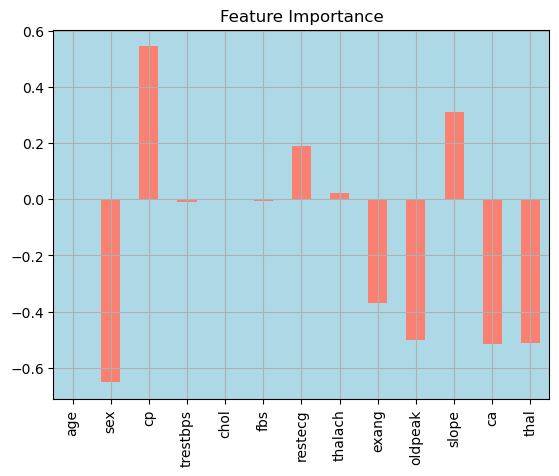

In [90]:
feature_df=pd.DataFrame(feature_dict,index=[0])
ax=feature_df.T.plot.bar(title="Feature Importance",
                     legend=None,
                     color="Salmon",
                     grid=True);
ax.set_facecolor("lightblue")

In [94]:
import pickle
pickle.dump(clff,open("end-to-end-heart-disease-model.pkl","wb"))

NameError: name 'end' is not defined